<a href="https://colab.research.google.com/github/ArtemKarDev/Kaggle/blob/main/EDA_Netflix_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Netflix - развивающийся популярный стриминговый сервис. 

Проведем разведочный анализ данных с использованием интерактивной библиотеки визулизации данных - Plotly. <br>
Построим рекомендательную систему

Визуальный анализ данных 
1. Анализ набора данных Netflix
2. Составление системы рекомендаций для пользователей (Content based filtering)

In [42]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image
from plotly.offline import iplot, init_notebook_mode
from IPython.display import HTML

In [33]:
!pip install gitly
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from gitly.colab.plot import GitlyPlotter

# Instantiate the object using 'github' or 'git' for static plots
# or 'colab' for default dinamic Plotly plots
gitly = GitlyPlotter('github')

Загрузил датасет с https://www.kaggle.com/datasets/shivamb/netflix-shows
к себе на google-диск 

In [2]:
# загружаем датасет в ноутбус с моего google-диска
!wget 'https://drive.google.com/uc?id=1JscRWVxO3DyBBBBr21fpeRHeUcmN5yhL' -O netflix_titles.csv


--2022-08-01 10:58:00--  https://drive.google.com/uc?id=1JscRWVxO3DyBBBBr21fpeRHeUcmN5yhL
Resolving drive.google.com (drive.google.com)... 142.250.141.138, 142.250.141.100, 142.250.141.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/abi2dam46dcte25mk3nrd1958vk1cfoa/1659351450000/00838955718561688027/*/1JscRWVxO3DyBBBBr21fpeRHeUcmN5yhL?uuid=8f2394f5-ad8b-4d0a-913d-bf312ed7def0 [following]
--2022-08-01 10:58:02--  https://doc-08-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/abi2dam46dcte25mk3nrd1958vk1cfoa/1659351450000/00838955718561688027/*/1JscRWVxO3DyBBBBr21fpeRHeUcmN5yhL?uuid=8f2394f5-ad8b-4d0a-913d-bf312ed7def0
Resolving doc-08-14-docs.googleusercontent.com (doc-08-14-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to doc

In [3]:
netflix_overall = pd.read_csv('netflix_titles.csv')
netflix_overall.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6992,s6993,Movie,Hoodwinked Too! Hood vs. Evil,Mike Disa,"Hayden Panettiere, Glenn Close, Patrick Warbur...",United States,"November 3, 2018",2011,PG,86 min,"Children & Family Movies, Comedies","Fresh off a top-secret training, feisty heroin..."
8676,s8677,Movie,Viking Destiny,David L.G. Hughes,"Anna Demetriou, Timo Nieminen, Will Mellor, An...","United Kingdom, Belgium","February 2, 2019",2018,R,91 min,"Action & Adventure, Sci-Fi & Fantasy","Framed for her father’s murder, an exiled Viki..."
6728,s6729,TV Show,Ezel,NaN,"Kenan İmirzalıoğlu, Cansu Dere, Haluk Bilginer...",Turkey,"December 26, 2016",2009,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A young man framed for a crime escapes a priso...
99,s100,TV Show,On the Verge,NaN,"Julie Delpy, Elisabeth Shue, Sarah Jones, Alex...","France, United States","September 7, 2021",2021,TV-MA,1 Season,"TV Comedies, TV Dramas","Four women — a chef, a single mom, an heiress ..."
3877,s3878,Movie,Anthony Jeselnik: Fire in the Maternity Ward,Marcus Raboy,Anthony Jeselnik,United States,"April 30, 2019",2019,TV-MA,64 min,Stand-Up Comedy,"Forging his own comedic boundaries, Anthony Je..."
1777,s1778,Movie,Kaali Khuhi,Terrie Samundra,"Shabana Azmi, Leela Samson, Sanjeeda Sheikh, S...",India,"October 30, 2020",2020,TV-14,91 min,"Horror Movies, International Movies",When a restless spirit curses a village that h...
3672,s3673,Movie,Kidnapping Stella,Thomas Sieben,"Max von der Groeben, Jella Haase, Clemens Schick",Germany,"July 12, 2019",2019,TV-MA,90 min,"Dramas, International Movies, Thrillers","Snatched off the street and held for ransom, a..."
7152,s7153,Movie,Just Friends,Roger Kumble,"Anna Faris, Ty Olsson, Julie Hagerty, Amy Smar...","Germany, United States, Canada","September 1, 2019",2005,PG-13,94 min,"Comedies, Romantic Movies","Years after high school, a once-portly nice gu..."
1047,s1048,TV Show,Peasants Rebellion,NaN,"Ward El Kal, Aimée Sayah, Bassem Moughnie, Car...",Lebanon,"April 15, 2021",2018,TV-14,1 Season,"International TV Shows, TV Dramas","In feudalistic Lebanon, farmers revolt against..."
2061,s2062,Movie,Barbie Princess Adventure,Conrad Helten,"America Young, Erica Lindbeck, Ritesh Rajan, D...",Netherlands,"September 1, 2020",2020,TV-Y,72 min,"Children & Family Movies, Music & Musicals","Through music and magic, Barbie learns what it..."


In [4]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


наблюдаем наличие пропусков в некоторых колонках, но для разведки это не кретично.

In [5]:
netflix_shows = netflix_overall[netflix_overall['type'] == 'TV Show'].copy()

netflix_movie = netflix_overall[netflix_overall['type'] == 'Movie'].copy()

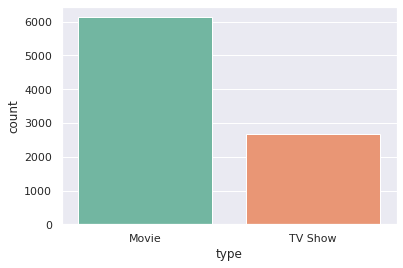

In [45]:
netflix_counts = netflix_overall['type'].value_counts()
'''
fig = px.bar(netflix_counts, x="type", color='type', title="Counts", text_auto='.3s')
fig.update_layout(autosize=False, width=600, height=400)
#fig.show()
HTML(fig.to_html())
'''
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data=netflix_overall, palette="Set2")


Количество фильмов на Netflix больше чем сериалов более чем в 2 раза

### Длительность видеоконтента

In [7]:
topdirs = pd.value_counts(netflix_overall['duration'])
topdirs.head(10)

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: duration, dtype: int64

In [8]:
from plotly import graph_objects as go

fig = go.Figure([ 
      go.Bar(x=topdirs.index, 
             y=topdirs.values, 
             text=topdirs.values, 
             marker_color='indianred'
             ) 
      ])

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

Длительность в таблице указана в текстовом формате. Чаще всего указывается длительность - 'Season', тоесть Сезон - для твшоу(сериалов). но мы же знаем что фильмов больше, да - но длительность фильмов очень сильно вариативна.

# Анализ фильмов

## Какой месяц, самый перспективный для релиза контента?
вычислим месяц с наименьшим количеством публикуемого контента - для наименьшей конкуренции за зрителя

In [9]:
# проверим есть ли пропуски в датах публикации фильма
netflix_overall.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
# дропнем записи с пустой датой публикации
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date.isna().sum()

date_added    0
dtype: int64

In [11]:
# посмотрим что получилось
netflix_date.sample(5)

,date_added
382,"July 27, 2021"
7629,"August 1, 2017"
2230,"July 17, 2020"
7767,"January 1, 2016"
4366,"November 23, 2018"


из этой записи необходимо выделить год и месяц - добавим их в новые столбцы

In [12]:
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])
netflix_date.head()

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September


In [13]:
# посмотрим на самые ранние добавления фильмов
netflix_date.sort_values(by=['year','month']).head()

,date_added,year,month
6611,"February 4, 2008",2008,February
5940,"August 2, 2013",2013,August
7112,"March 31, 2013",2013,March
6885,"October 8, 2013",2013,October
7908,"October 14, 2013",2013,October


Интересно - между первой и второй публикацией фильмов 5 лет - видимо в этот период пуликовали только сериалы.

In [14]:
# для сортировки по месяцу сделаем споком месяцев
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] #[::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
January,0.0,0.0,0.0,0.0,28.0,14.0,24.0,37.0,53.0,36.0
February,1.0,0.0,1.0,1.0,6.0,17.0,24.0,45.0,42.0,44.0
March,0.0,1.0,0.0,2.0,3.0,38.0,35.0,53.0,44.0,37.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0


In [15]:
fig = px.imshow(df,width=500, height=500)
fig.show()

С помощью plotly  очень просто визуализировать. Всё параметры применилиь автоматически - видим по самой яркой точке - июль 2021го самый "жаркий" месяц по публикациям фильмов.<br>
Но нам наиболее интересен наоборот самый холодный месяц - например январь несколько лет подряд в этот месяц наименьшее количество публикаций, но в связи с праздниками и длинными ввыходнымидолжно быть наибольшее количество просмотров. Но в США с 3го января уже начинают работать. Будем целиться на Российский сегмент зрителей.

## Рейтинги фильмов


исследуем взрасной рейтинг фильмов

In [16]:
fig = go.Figure([ 
      go.Bar(y=netflix_movie['rating'].value_counts(), 
             x=netflix_movie['rating'].value_counts().index[:10], 
             text=netflix_movie['rating'].value_counts().values
             ) 
      ])

fig.update_layout(#legend_orientation="h",
                  #legend=dict(x=.5, xanchor="center"),
                  title="Количество фильмов по рейтингам",
                  xaxis_title="Рейтинги",
                  yaxis_title="Количество фильмов",
                  #margin=dict(l=0, r=0, t=30, b=0),
                  width=600, height=400)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside')
fig.show()

1. ТV-МА - Самая большая группа. Такой рейтинг дается фильмам только для взрослой аудитории.
2. ТV-14 - Вторая группа по величине. Контент фильма с таким рейтингом не подходит для детей младше 14 лет.
3. R - Фильмы не подходят для просмотра детям до 17 лет.

## Анализ года выпуска фильма

In [17]:
df_release = netflix_movie['release_year'].value_counts()[:15]

In [18]:
fig = px.bar(y=df_release.values, 
             x=df_release.index, 
             text=df_release.values)
fig.update_layout(title="Количество фильмов в год",
                  xaxis_title="Год",
                  yaxis_title="Количество фильмов",
                  width=800, height=400)
fig.show()

2017 и 2018 самый частый год выпуска фильмов

## Топ 10 стран по выпуску фильмов

In [19]:
#  проверим на пропуски 
netflix_movie.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

в колонке "страна" - есть пропуски  - но  не будем избовляться от этих записей - заполним их неизвестностью

In [20]:
netflix_movie['country'].fillna("Unknow", inplace=True)
netflix_movie.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country           0
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [21]:
netflix_movie['country'].value_counts()

United States                            2058
India                                     893
Unknow                                    440
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 652, dtype: int64

В некоторых записях есть перечень стран учавствовавших в создании фильма - 

In [22]:
countries_mov = {} # подготовим словарь для хранения страны с количеством упонинаий в колонке country

cou = list(netflix_movie['country']) # соберем все записи из колонки country в список
for i in cou:               # пройдемся по этому списку
    i = i.replace(' ', '') # уберем пробелы если есть
    i = list(i.split(',')) # и разделим по запятым

    for j in i:   # теперь пройдемся по разделенным записям
        if j in list(countries_mov.keys()):  # и будем добавлять или увеличивать счетчик при наличии страны в словаре
            countries_mov[j] += 1
        else:
            countries_mov[j] = 1

# отсортируем и возьмем 10 первых чаще упоминающихся стран
countries_fin = sorted(countries_mov.items(), key=lambda item: countries_mov[item[0]], reverse=True)[:10]
countries_fin

[('UnitedStates', 2752),
 ('India', 962),
 ('UnitedKingdom', 534),
 ('Unknow', 440),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 119),
 ('China', 114)]

In [23]:
# визуализируем полученные данные
names = [name for name, values in countries_fin]
values = [values for name, values in countries_fin]

fig = px.bar(x=names, 
             y=values, 
             text=names)
fig.update_layout(title="Количество фильмов по странам",
                  xaxis_title="Страна",
                  yaxis_title="Количество фильмов",
                  width=800, height=400)
fig.show()

## Анализ продолжительноси фильмов


In [24]:
netflix_movie['duration'].value_counts().head()

90 min    152
94 min    146
93 min    146
97 min    146
91 min    144
Name: duration, dtype: int64

In [25]:
netflix_movie['duration'].isna().sum()

3

In [26]:
netflix_movie['duration'].fillna(netflix_movie['duration'].mode()).shape

(6131,)

In [27]:
netflix_movie['duration'] = netflix_movie['duration'].fillna(netflix_movie['duration'].mode())
netflix_movie['duration'] = netflix_movie['duration'].dropna()
netflix_movie[netflix_movie['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


преобразуем тип значений для отрисовки частотности

In [28]:
# удалим слово min
netflix_movie['duration'] = netflix_movie['duration'].str.replace(' min', '')
# оставшиеся цифры переведем в int
netflix_movie['duration'] = netflix_movie['duration'].astype(int)
netflix_movie['duration']

ValueError: ignored

In [ ]:
fig = px.histogram(x=netflix_movie['duration'])
fig.show()

## Анализ жанров